## 01 Data Cleaning

This notebook contains the code for preliminary data exploration, tidying, and minor cleaning (NA values removed, categorical and numerical variables analyzed, and some preliminary visualizations created). 


In [31]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

#Get current working directory (.\\notebooks) -----HR
cwd = os.getcwd()

#Allow current working directory to search main folder to access the Data sub-folder. -----HR
parent = os.path.dirname(cwd)

#Accessed data sub-folder to pull data file path ------HR
file_path = os.path.join(parent,"Data","stock_and_econ.xlsx")

#Load data into environment using the file path variable with appropriate relative path. -----HR
df= pd.read_excel(file_path)

In [32]:
#Examination of the first 5 rows of the stock and econ dataset. ------AP
print(df.head())

  Ticker                Long Name As Of Date Quarter  Year  Label  \
0    MMM                    3M CO 2024-12-31      Q4  2024      0   
1    ABT      ABBOTT LABORATORIES 2024-12-31      Q4  2024      0   
2   ABBV               ABBVIE INC 2024-12-31      Q4  2024      0   
3  ACNCL       ACCENTURE PLC-CL A 2024-12-31      Q4  2024      0   
4   ATVI  ACTIVISION BLIZZARD INC 2024-12-31      Q4  2024      0   

   Market Value (%)   Div Yld        P/E       P/CF  ...  GDP CYOY Index  \
0          0.112978  2.169029  12.125959  36.257446  ...             2.5   
1          0.098993  2.086464  31.060309  22.592426  ...             2.5   
2          0.155521  3.691615  23.327688  19.046702  ...             2.5   
3          0.307883  1.682822  28.674432  22.861091  ...             2.5   
4               NaN       NaN        NaN        NaN  ...             2.5   

   EHUPUS Index  CONCCONF Index  USYC2Y10 Index  CSI BARC Index  SPX Index PE  \
0          4.13           109.5          32.529

In [33]:
#All Columns contained in the stock_and_econ dataset. ------AP
print(df.columns)

Index(['Ticker', 'Long Name', 'As Of Date', 'Quarter', 'Year', 'Label',
       'Market Value (%)', 'Div Yld', 'P/E', 'P/CF', 'P/B', 'Debt/Equity',
       'Current Ratio', 'BEst Div Yld', 'ROE', 'ROA', 'Op Margin',
       'Profit Margin', 'Debt/EBITDA', 'P/EBITDA', 'FCF Gr', 'FCF Yld',
       'P/FCF', 'Div Pay Ratio', 'Free CF', 'Inv Gr', 'Earn Yld',
       '5yr Avg P/E', 'CF Gr', 'EBITDA Gr', 'FCF Gr_2', 'Net Inc Gr',
       'Op Inc Gr', 'Work Cap Gr', 'ROC', 'FDTR Index', 'GT10 Govt',
       'CPI YOY Index', 'PPI YOY Index', 'GDP CYOY Index', 'EHUPUS Index',
       'CONCCONF Index', 'USYC2Y10 Index', 'CSI BARC Index', 'SPX Index PE',
       'VIX Index', 'BBGCUSDI Index', 'Sector', 'year_inco'],
      dtype='object')


In [34]:
#Basic statistical analysis of each feature. ----AP
print(df.describe())

                          As Of Date          Year         Label  \
count                          41439  41439.000000  41439.000000   
mean   2016-08-30 13:01:12.714110208   2016.040759      0.011921   
min              2007-03-30 00:00:00   2007.000000      0.000000   
25%              2011-12-30 00:00:00   2011.000000      0.000000   
50%              2016-12-30 00:00:00   2016.000000      0.000000   
75%              2021-06-30 00:00:00   2021.000000      0.000000   
max              2024-12-31 00:00:00   2024.000000      1.000000   
std                              NaN      5.305317      0.108533   

       Market Value (%)       Div Yld           P/E          P/CF  \
count      37226.000000  27736.000000  34388.000000  35031.000000   
mean           0.198786      2.402346     40.049009     23.104885   
min            0.001032      0.014322      0.302410      0.057633   
25%            0.077192      1.271706     14.375976      8.368367   
50%            0.135145      2.153087     

In [35]:
#Total NA values for each feature in the stock and econ dataset. ------AP
print(df.isnull().sum())

Ticker                  0
Long Name               0
As Of Date              0
Quarter                 0
Year                    0
Label                   0
Market Value (%)     4213
Div Yld             13703
P/E                  7051
P/CF                 6408
P/B                  6192
Debt/Equity          5324
Current Ratio        9208
BEst Div Yld         7837
ROE                  6052
ROA                  4471
Op Margin            4490
Profit Margin        4267
Debt/EBITDA          7099
P/EBITDA             8894
FCF Gr              11218
FCF Yld              6114
P/FCF               11443
Div Pay Ratio        8460
Free CF              5571
Inv Gr              16625
Earn Yld             7051
5yr Avg P/E          8200
CF Gr                4805
EBITDA Gr            7690
FCF Gr_2            11637
Net Inc Gr           4598
Op Inc Gr            4696
Work Cap Gr         12635
ROC                  9401
FDTR Index           1120
GT10 Govt            1120
CPI YOY Index        1120
PPI YOY Inde

In [36]:
#Percentage of NAs in each feature. ----AP
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))

Inv Gr              40.119211
Div Yld             33.067883
Work Cap Gr         30.490601
FCF Gr_2            28.082241
P/FCF               27.614083
FCF Gr              27.071117
ROC                 22.686358
Current Ratio       22.220613
P/EBITDA            21.462873
Div Pay Ratio       20.415551
5yr Avg P/E         19.788122
BEst Div Yld        18.912136
EBITDA Gr           18.557398
Debt/EBITDA         17.131205
Earn Yld            17.015372
P/E                 17.015372
P/CF                15.463694
P/B                 14.942446
FCF Yld             14.754217
ROE                 14.604600
Free CF             13.443857
Debt/Equity         12.847800
CF Gr               11.595357
Op Inc Gr           11.332320
Net Inc Gr          11.095828
Op Margin           10.835204
ROA                 10.789353
Profit Margin       10.297063
Market Value (%)    10.166751
year_inco            3.928666
Sector               3.571515
CPI YOY Index        2.702768
PPI YOY Index        2.702768
EHUPUS Ind

In [37]:
#drop columns with more than 50% missing values
df=df.dropna(thresh=len(df)*0.5, axis=1)

In [38]:
#Examine columns remaining after >50% NA cols dropped -----AP
print(df.columns)

Index(['Ticker', 'Long Name', 'As Of Date', 'Quarter', 'Year', 'Label',
       'Market Value (%)', 'Div Yld', 'P/E', 'P/CF', 'P/B', 'Debt/Equity',
       'Current Ratio', 'BEst Div Yld', 'ROE', 'ROA', 'Op Margin',
       'Profit Margin', 'Debt/EBITDA', 'P/EBITDA', 'FCF Gr', 'FCF Yld',
       'P/FCF', 'Div Pay Ratio', 'Free CF', 'Inv Gr', 'Earn Yld',
       '5yr Avg P/E', 'CF Gr', 'EBITDA Gr', 'FCF Gr_2', 'Net Inc Gr',
       'Op Inc Gr', 'Work Cap Gr', 'ROC', 'FDTR Index', 'GT10 Govt',
       'CPI YOY Index', 'PPI YOY Index', 'GDP CYOY Index', 'EHUPUS Index',
       'CONCCONF Index', 'USYC2Y10 Index', 'CSI BARC Index', 'SPX Index PE',
       'VIX Index', 'BBGCUSDI Index', 'Sector', 'year_inco'],
      dtype='object')


In [39]:
#impute missing values with mean for numeric columns -----AP
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [40]:
#impute missing values with mode for categorical columns -----AP
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

#Examine cols -----AP
print(df.columns)

Index(['Ticker', 'Long Name', 'As Of Date', 'Quarter', 'Year', 'Label',
       'Market Value (%)', 'Div Yld', 'P/E', 'P/CF', 'P/B', 'Debt/Equity',
       'Current Ratio', 'BEst Div Yld', 'ROE', 'ROA', 'Op Margin',
       'Profit Margin', 'Debt/EBITDA', 'P/EBITDA', 'FCF Gr', 'FCF Yld',
       'P/FCF', 'Div Pay Ratio', 'Free CF', 'Inv Gr', 'Earn Yld',
       '5yr Avg P/E', 'CF Gr', 'EBITDA Gr', 'FCF Gr_2', 'Net Inc Gr',
       'Op Inc Gr', 'Work Cap Gr', 'ROC', 'FDTR Index', 'GT10 Govt',
       'CPI YOY Index', 'PPI YOY Index', 'GDP CYOY Index', 'EHUPUS Index',
       'CONCCONF Index', 'USYC2Y10 Index', 'CSI BARC Index', 'SPX Index PE',
       'VIX Index', 'BBGCUSDI Index', 'Sector', 'year_inco'],
      dtype='object')


In [41]:
# Select only numerical columns for correlation matrix -----AP
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix ----- AP
correlation_matrix = df[numerical_cols].corr()

# Print the correlation matrix ----- AP
print(correlation_matrix)

                      Year     Label  Market Value (%)   Div Yld       P/E  \
Year              1.000000 -0.010735         -0.029234 -0.002620  0.010240   
Label            -0.010735  1.000000          0.002982  0.003883 -0.003956   
Market Value (%) -0.029234  0.002982          1.000000 -0.077433  0.005667   
Div Yld          -0.002620  0.003883         -0.077433  1.000000 -0.000509   
P/E               0.010240 -0.003956          0.005667 -0.000509  1.000000   
P/CF              0.011911 -0.002925          0.004398 -0.007147  0.005016   
P/B               0.020272 -0.003357          0.015665 -0.009313  0.003346   
Debt/Equity       0.008014  0.002705          0.000020  0.007850  0.000294   
Current Ratio    -0.055791 -0.017740          0.054157 -0.074114  0.011780   
BEst Div Yld      0.028134  0.000415         -0.129708  0.730830 -0.022969   
ROE               0.064536 -0.000757          0.051694 -0.031235 -0.010425   
ROA               0.049153  0.003498          0.149382 -0.136607

In [42]:
#Examining all correlation pairs that are highly correlated (greater than 0.9) -----AP
high_corr_pairs = correlation_matrix[correlation_matrix > 0.9]

#Print correlation matrix -----AP 
print(high_corr_pairs)

                  Year  Label  Market Value (%)  Div Yld  P/E  P/CF  P/B  \
Year               1.0    NaN               NaN      NaN  NaN   NaN  NaN   
Label              NaN    1.0               NaN      NaN  NaN   NaN  NaN   
Market Value (%)   NaN    NaN               1.0      NaN  NaN   NaN  NaN   
Div Yld            NaN    NaN               NaN      1.0  NaN   NaN  NaN   
P/E                NaN    NaN               NaN      NaN  1.0   NaN  NaN   
P/CF               NaN    NaN               NaN      NaN  NaN   1.0  NaN   
P/B                NaN    NaN               NaN      NaN  NaN   NaN  1.0   
Debt/Equity        NaN    NaN               NaN      NaN  NaN   NaN  NaN   
Current Ratio      NaN    NaN               NaN      NaN  NaN   NaN  NaN   
BEst Div Yld       NaN    NaN               NaN      NaN  NaN   NaN  NaN   
ROE                NaN    NaN               NaN      NaN  NaN   NaN  NaN   
ROA                NaN    NaN               NaN      NaN  NaN   NaN  NaN   
Op Margin   

In [43]:
# Drop rows and columns with all NaN values in the correlation matrix -----AP
valid_correlation_matrix = correlation_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Print the cleaned correlation matrix -----AP
print(valid_correlation_matrix)

                      Year     Label  Market Value (%)   Div Yld       P/E  \
Year              1.000000 -0.010735         -0.029234 -0.002620  0.010240   
Label            -0.010735  1.000000          0.002982  0.003883 -0.003956   
Market Value (%) -0.029234  0.002982          1.000000 -0.077433  0.005667   
Div Yld          -0.002620  0.003883         -0.077433  1.000000 -0.000509   
P/E               0.010240 -0.003956          0.005667 -0.000509  1.000000   
P/CF              0.011911 -0.002925          0.004398 -0.007147  0.005016   
P/B               0.020272 -0.003357          0.015665 -0.009313  0.003346   
Debt/Equity       0.008014  0.002705          0.000020  0.007850  0.000294   
Current Ratio    -0.055791 -0.017740          0.054157 -0.074114  0.011780   
BEst Div Yld      0.028134  0.000415         -0.129708  0.730830 -0.022969   
ROE               0.064536 -0.000757          0.051694 -0.031235 -0.010425   
ROA               0.049153  0.003498          0.149382 -0.136607

In [44]:
#Selecting columns to be used in the cleaned dataset. -----AP
selected_columns = [
   'Market Value (%)', 'Div Yld', 'P/E', 'P/CF', 'P/B', 'Debt/Equity',
    'ROE', 'ROA', 'Profit Margin', 'FCF Gr', 'EBITDA Gr', 'Net Inc Gr',
    'GDP CYOY Index', 'CPI YOY Index', 'PPI YOY Index', 'EHUPUS Index',
    'CONCCONF Index', 'USYC2Y10 Index', 'Year', 'Quarter', 'Label'
]

In [45]:
#final_df created with cleaned stock_and_econ dataset. -----AP
final_df = df[selected_columns]

In [46]:
#Basic statistical analysis of cleaned dataset. -----AP
print(final_df.describe())

       Market Value (%)       Div Yld           P/E          P/CF  \
count      41439.000000  41439.000000  41439.000000  41439.000000   
mean           0.198786      2.402346     40.049009     23.104885   
std            0.380350      1.334247    532.604473    350.088542   
min            0.001032      0.014322      0.302410      0.057633   
25%            0.083366      1.696308     15.490287      9.243300   
50%            0.149534      2.402346     22.862968     15.627957   
75%            0.205092      2.648031     40.049009     23.104885   
max           17.548735     52.677280  85278.504617  58987.649947   

                P/B    Debt/Equity           ROE           ROA  Profit Margin  \
count  41439.000000   41439.000000  41439.000000  41439.000000   41439.000000   
mean       9.197545     211.071545     20.903953      6.650602       8.246190   
std      109.046041    3309.508546     55.447120      8.649500     118.692626   
min        0.113592       0.000000  -5167.399597   -12

In [47]:
#Check if any NA values remain in the dataset. -----AP
print(final_df.isnull().sum())

Market Value (%)    0
Div Yld             0
P/E                 0
P/CF                0
P/B                 0
Debt/Equity         0
ROE                 0
ROA                 0
Profit Margin       0
FCF Gr              0
EBITDA Gr           0
Net Inc Gr          0
GDP CYOY Index      0
CPI YOY Index       0
PPI YOY Index       0
EHUPUS Index        0
CONCCONF Index      0
USYC2Y10 Index      0
Year                0
Quarter             0
Label               0
dtype: int64


In [48]:
#generate descriptive statistics for the numeric columns -----AP
numerical_stats = final_df.describe()
print(numerical_stats)
#generate descriptive statistics for the categorical columns -----AP
categorical_stats = final_df.describe(include=['object'])
print(categorical_stats)


       Market Value (%)       Div Yld           P/E          P/CF  \
count      41439.000000  41439.000000  41439.000000  41439.000000   
mean           0.198786      2.402346     40.049009     23.104885   
std            0.380350      1.334247    532.604473    350.088542   
min            0.001032      0.014322      0.302410      0.057633   
25%            0.083366      1.696308     15.490287      9.243300   
50%            0.149534      2.402346     22.862968     15.627957   
75%            0.205092      2.648031     40.049009     23.104885   
max           17.548735     52.677280  85278.504617  58987.649947   

                P/B    Debt/Equity           ROE           ROA  Profit Margin  \
count  41439.000000   41439.000000  41439.000000  41439.000000   41439.000000   
mean       9.197545     211.071545     20.903953      6.650602       8.246190   
std      109.046041    3309.508546     55.447120      8.649500     118.692626   
min        0.113592       0.000000  -5167.399597   -12

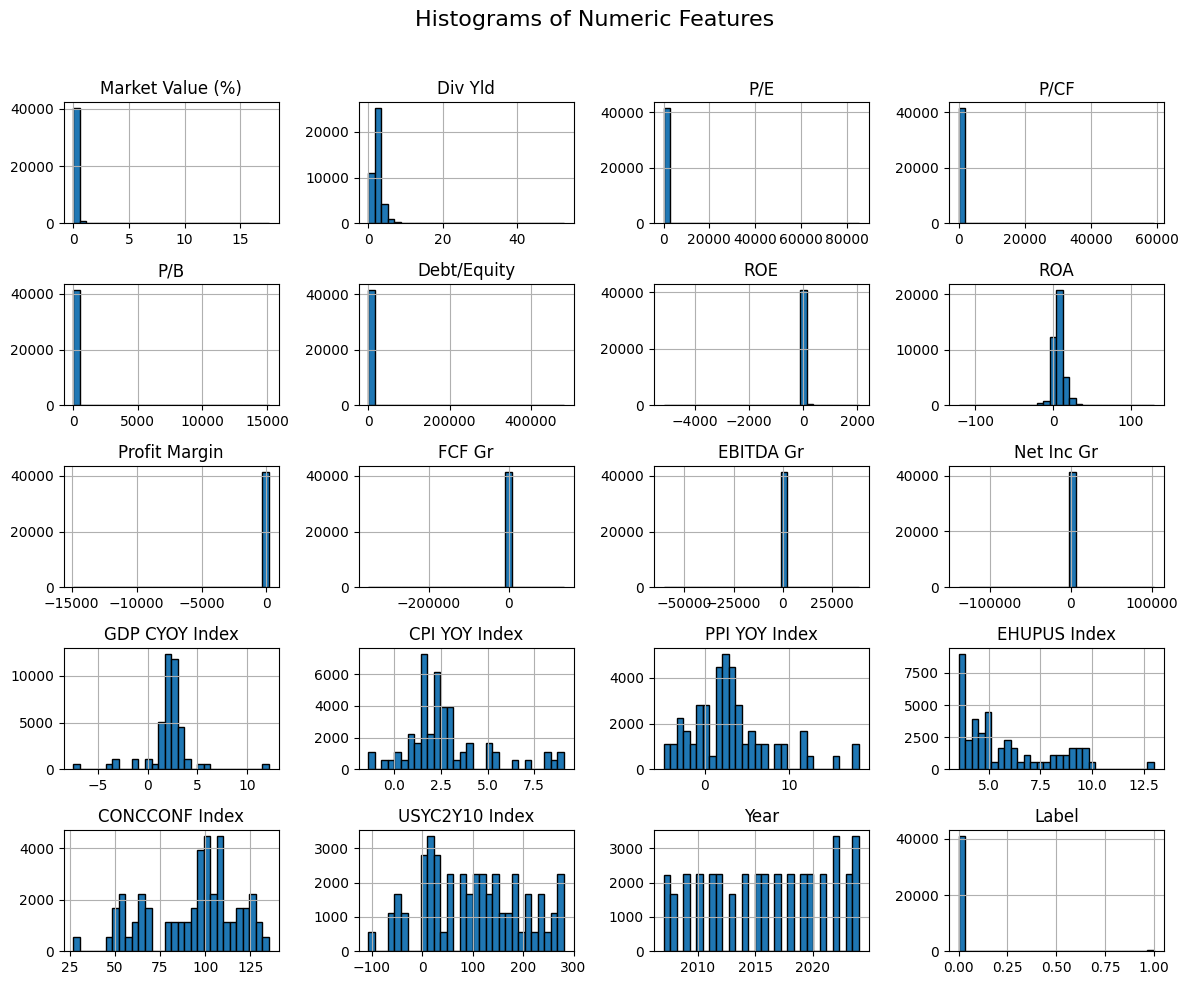

In [49]:
#01. Histogram showcasing all of the numeric features in the cleaned dataset. -----AP
final_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

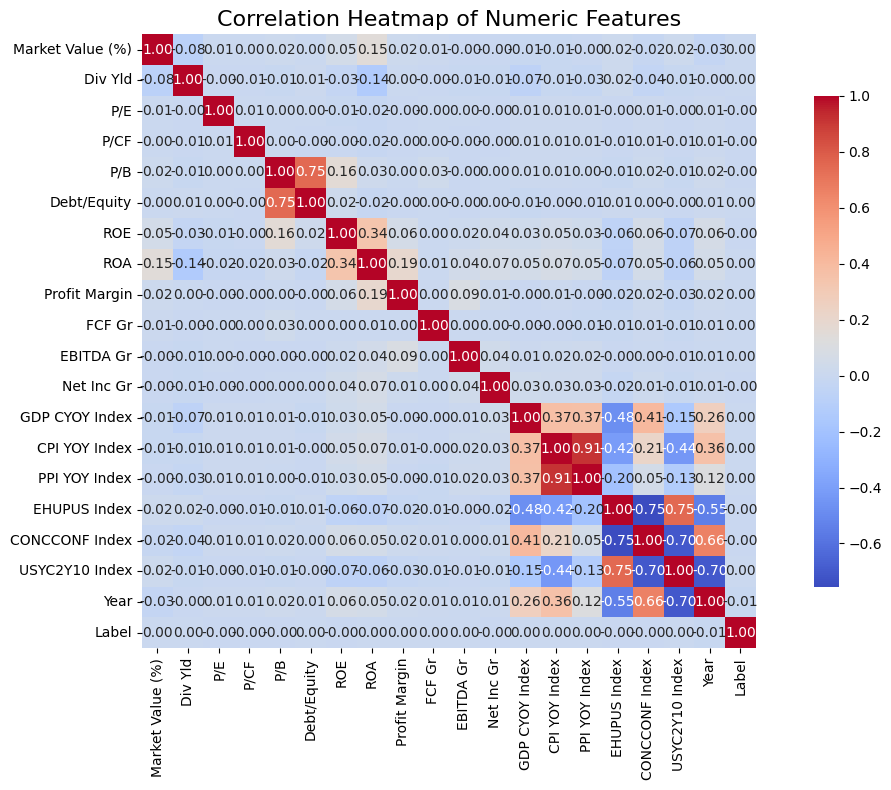

In [50]:
#02. Correlation Heatmap: Showcasing all possibly high correlated pairs after cleaning. -----AP
plt.figure(figsize=(12, 8))
#select only numeric columns for the heatmap
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
#calculate the correlation matrix
correlation_matrix = final_df[numeric_columns].corr()
#generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

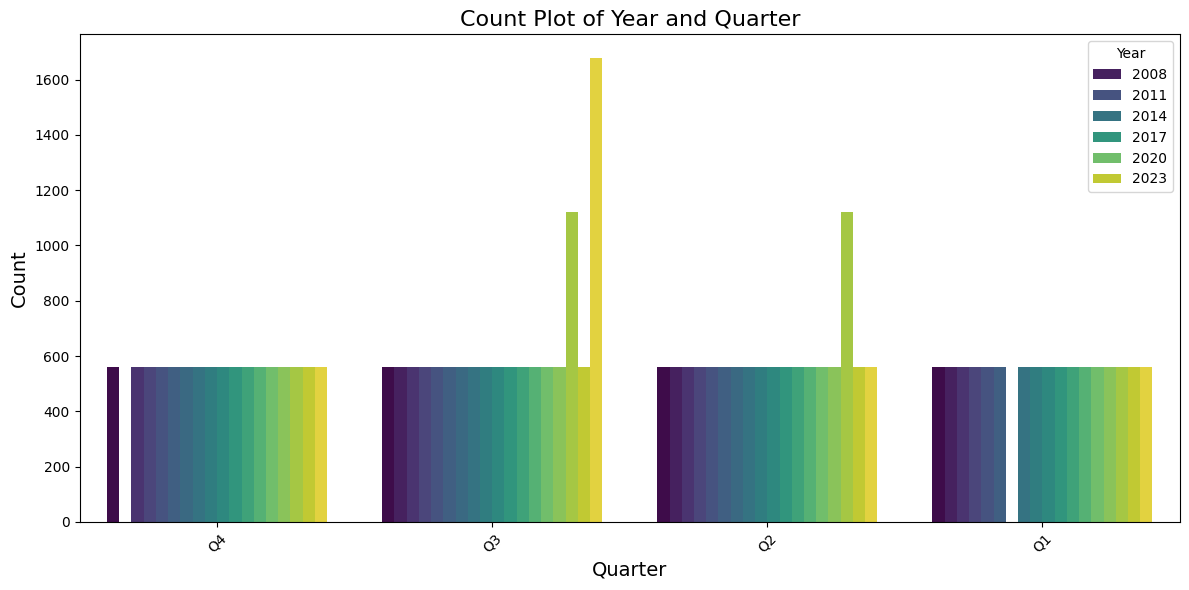

In [51]:
#03. Count plot for each quarter and year using all categorical features in the cleaned dataset. -----AP
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='Quarter', palette='viridis', hue='Year')
plt.title('Count Plot of Year and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


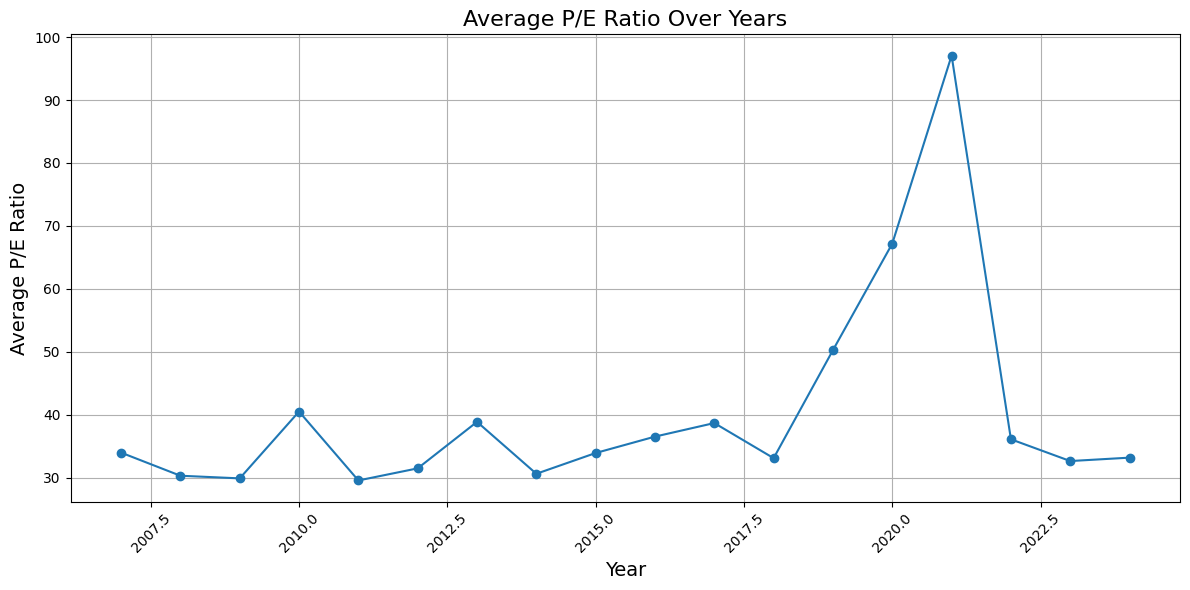

In [52]:
#04. Time series graph -----AP
plt.figure(figsize=(12, 6))
yearly_avg_pe = final_df.groupby('Year')['P/E'].mean()
plt.plot(yearly_avg_pe.index, yearly_avg_pe.values, marker='o')
plt.title('Average P/E Ratio Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average P/E Ratio', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#The line plot titled "Average P/E Ratio Over Years" 
# shows how the average Price-to-Earnings (P/E) ratio has 
# changed over time. 
#Fluctuations in P/E Ratios:
#The P/E ratio remains relatively stable between 2007 and 2018, with minor fluctuations.
#There is a sharp increase in the average P/E ratio around 2019–2020, peaking at nearly 100.
#After 2020, the P/E ratio drops significantly and stabilizes at lower levels.

In [53]:
#Print final dataset to .csv file for further cleaning and processing. Hidden to prevent duplicate data files. 
#final_df.to_csv("final_dataset_v1.csv", index=False)